In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet

In [ ]:
df = pd.read_excel('/content/US_births_1994-2003_CDC_NCHS (1).xlsx')

In [ ]:
df.head()

,year,month,date_of_month,day_of_week,births,date
0,1994.0,1.0,1.0,6.0,8096.0,1994-01-01
1,1994.0,1.0,2.0,7.0,7772.0,1994-01-02
2,1994.0,1.0,3.0,1.0,10142.0,1994-01-03
3,1994.0,1.0,4.0,2.0,11248.0,1994-01-04
4,1994.0,1.0,5.0,3.0,11053.0,1994-01-05


In [ ]:
df.tail()

,year,month,date_of_month,day_of_week,births,date
3647,2003.0,12.0,27.0,6.0,8646.0,2003-12-27
3648,2003.0,12.0,28.0,7.0,7645.0,2003-12-28
3649,2003.0,12.0,29.0,1.0,12823.0,2003-12-29
3650,2003.0,12.0,30.0,2.0,14438.0,2003-12-30
3651,2003.0,12.0,31.0,3.0,12374.0,2002-12-31


In [ ]:
df = df[['date','births']]
df.head()

,date,births
0,1994-01-01,8096.0
1,1994-01-02,7772.0
2,1994-01-03,10142.0
3,1994-01-04,11248.0
4,1994-01-05,11053.0


In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df.head()

,date,births
0,1994-01-01,8096.0
1,1994-01-02,7772.0
2,1994-01-03,10142.0
3,1994-01-04,11248.0
4,1994-01-05,11053.0


In [ ]:
df.columns = ['ds','y']
df.head()

,ds,y
0,1994-01-01,8096.0
1,1994-01-02,7772.0
2,1994-01-03,10142.0
3,1994-01-04,11248.0
4,1994-01-05,11053.0


In [ ]:
from fbprophet import Prophet

In [ ]:
df.head()

,ds,y
0,1994-01-01,8096.0
1,1994-01-02,7772.0
2,1994-01-03,10142.0
3,1994-01-04,11248.0
4,1994-01-05,11053.0


In [ ]:
model = Prophet()

In [ ]:
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'predict_seasonal_components',
 'predict_trend',
 'predict_uncertainty',
 'predictive_samples',
 'regressor_col

In [ ]:
model.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = model.make_future_dataframe(periods = 365)

In [ ]:
df.tail()

,ds,y
3647,2003-12-27,8646.0
3648,2003-12-28,7645.0
3649,2003-12-29,12823.0
3650,2003-12-30,14438.0
3651,2002-12-31,12374.0


In [ ]:
forecast = model.predict(future)

In [ ]:
future

,ds
0,1994-01-01
1,1994-01-02
2,1994-01-03
3,1994-01-04
4,1994-01-05
...,...
3912,2004-12-25
3913,2004-12-26
3914,2004-12-27
3915,2004-12-28


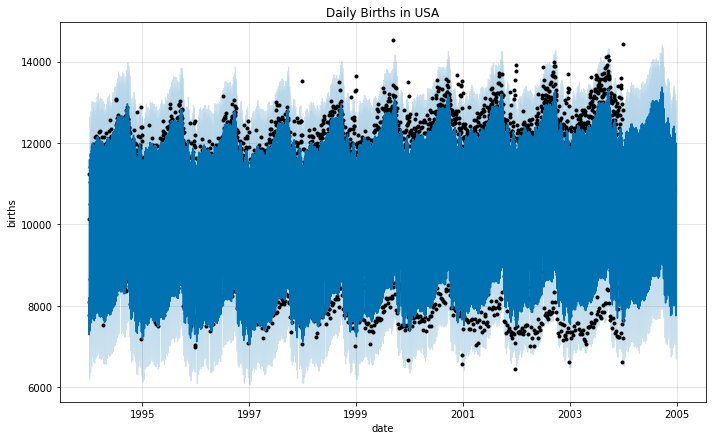

In [ ]:
fig = model.plot(forecast, xlabel='date',
                 ylabel='births')
plt.title('Daily Births in USA')
plt.show()


In [ ]:
forecast.head(3).T

,0,1,2
ds,1994-01-01 00:00:00,1994-01-02 00:00:00,1994-01-03 00:00:00
trend,10873.051405,10872.756353,10872.4613
yhat_lower,7154.226785,6206.63909,9373.004795
yhat_upper,9190.957457,8247.231273,11414.524711
trend_lower,10873.051405,10872.756353,10872.4613
trend_upper,10873.051405,10872.756353,10872.4613
additive_terms,-2675.887858,-3583.551067,-441.158985
additive_terms_lower,-2675.887858,-3583.551067,-441.158985
additive_terms_upper,-2675.887858,-3583.551067,-441.158985
weekly,-2041.047592,-2944.085935,197.70624


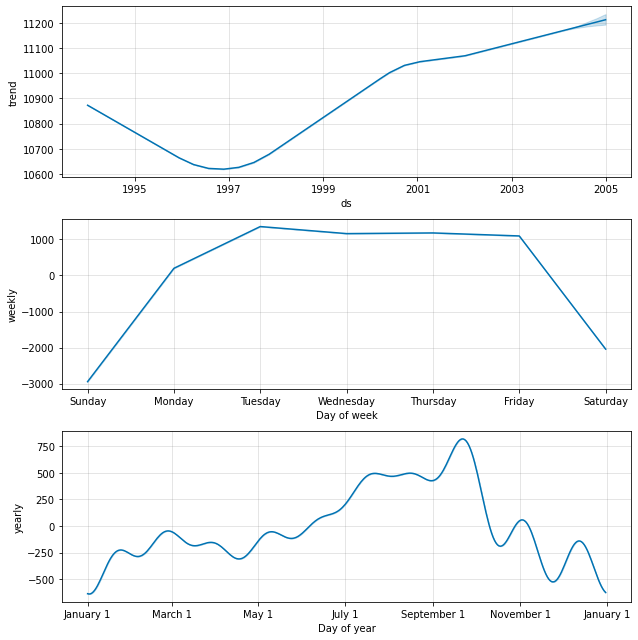

In [ ]:
fig2 = model.plot_components(forecast)
plt.show()

In [ ]:
from fbprophet.diagnostics import cross_validation

In [ ]:
df_cv=cross_validation(model,horizon='365 days',period='180 days',initial='1095 days')

INFO:fbprophet:Making 13 forecasts with cutoffs between 1997-01-30 00:00:00 and 2002-12-30 00:00:00


  0%|          | 0/13 [00:00<?, ?it/s]

In [ ]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1997-01-31,11276.907943,10408.443157,12136.411549,11818.0,1997-01-30
1,1997-02-01,8491.032454,7647.888517,9318.074203,8488.0,1997-01-30
2,1997-02-02,7705.136953,6850.854457,8553.432093,7706.0,1997-01-30
3,1997-02-03,10289.445802,9414.218531,11144.025481,10596.0,1997-01-30
4,1997-02-04,11406.463091,10539.131801,12247.196014,11621.0,1997-01-30


In [ ]:
df_cv.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
4741,2003-12-27,8511.169482,7505.858585,9527.896668,8646.0,2002-12-30
4742,2003-12-28,7582.882251,6551.976973,8522.494429,7645.0,2002-12-30
4743,2003-12-29,10598.989903,9570.649461,11599.912305,12823.0,2002-12-30
4744,2003-12-30,11738.536859,10781.971257,12703.610438,7205.0,2002-12-30
4745,2003-12-30,11738.536859,10744.769316,12726.558771,14438.0,2002-12-30


In [ ]:
from fbprophet.diagnostics import performance_metrics
df_performance = performance_metrics(df_cv)
df_performance.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,37 days,418900.041835,647.224877,381.665586,0.038313,0.024223,0.955395
1,38 days,394868.849352,628.385908,375.552127,0.037619,0.023840,0.957454
2,39 days,376252.372535,613.394141,371.077192,0.037064,0.023840,0.959916
3,40 days,374955.913644,612.336438,369.109243,0.036911,0.023687,0.957806
4,41 days,376307.989737,613.439475,369.446618,0.036953,0.023327,0.957806


In [ ]:
df_performance

,horizon,mse,rmse,mae,mape,mdape,coverage
0,37 days,4.189000e+05,647.224877,381.665586,0.038313,0.024223,0.955395
1,38 days,3.948688e+05,628.385908,375.552127,0.037619,0.023840,0.957454
2,39 days,3.762524e+05,613.394141,371.077192,0.037064,0.023840,0.959916
3,40 days,3.749559e+05,612.336438,369.109243,0.036911,0.023687,0.957806
4,41 days,3.763080e+05,613.439475,369.446618,0.036953,0.023327,0.957806
...,...,...,...,...,...,...,...
324,361 days,1.505573e+06,1227.017899,807.099388,0.082089,0.048637,0.732771
325,362 days,1.527878e+06,1236.073646,809.038185,0.082639,0.048084,0.736709
326,363 days,1.538193e+06,1240.239057,808.277696,0.082555,0.048084,0.739979
327,364 days,1.509011e+06,1228.418167,802.340859,0.081429,0.046544,0.740993


In [ ]:
!pip install flask-ngrok

In [ ]:
!pip install flask-bootstrap

     |████████████████████████████████| 456 kB 7.4 MB/s 
  Created wheel for flask-bootstrap: filename=Flask_Bootstrap-3.3.7.1-py3-none-any.whl size=460123 sha256=89f6a39405dd2b180c9bab17642740ce92d8479f8fe5987ef23d8c481a1af46c
  Stored in directory: /root/.cache/pip/wheels/67/a2/d6/50d039c9b59b4caca6d7b53839c8100354a52ab7553d2456eb
  Created wheel for visitor: filename=visitor-0.1.3-py3-none-any.whl size=3946 sha256=1f8ab7d09d254fa5830243af4c0aad340ce0b4010a2be23cc114e5898defa7cb
  Stored in directory: /root/.cache/pip/wheels/64/34/11/053f47218984c9a31a00f911ed98dda036b867481dcc527a12
Successfully built flask-bootstrap visitor
